In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table
import math

In [17]:
class GridWorld:
    def __init__(self, world_size=4, prob=0.25, theta=1e-4, gamma=1.0):
        self.world_size = world_size
        self.prob = prob
        self.gamma = gamma
        self.theta = theta
    
    def reset(self):
        self.actions = ['left', 'up', 'right', 'down']
        self.move = {'left':np.array([-1, 0]), 
                     'right':np.array([1, 0]), 
                     'up':np.array([0, -1]), 
                     'down':np.array([0, 1])}
        self.terminal = [0, 6] # [0, 0], [3, 3]
        self.state_values = np.zeros([self.world_size, self.world_size])

    def step(self, state, action):
        if state[0] + state[1] in self.terminal:
            return state, 0
        
        next_state = state + self.move[action]
        x, y = next_state
        if x < 0 or x >= self.world_size or y < 0 or y >= self.world_size:
            next_state = state
        return next_state, -1

    def iterate(self, k=np.inf):    
        if k == np.inf: 
            count = 0
            while True:
                delta = 0
                old_state_values = self.state_values.copy()
                new_state_values = self.state_values.copy() # Synchronous updating
                for x in range(self.world_size):
                    for y in range(self.world_size):
                        value = 0
                        for action in self.actions:
                            (next_x, next_y), reward = self.step(np.array([x, y]), action)
                            value += self.prob * (reward + self.gamma * self.state_values[next_x, next_y])
                        new_state_values[x, y] = value
                        delta = max(delta, abs(old_state_values[x, y] - value))
                if delta < self.theta:
                    break
                count += 1
                self.state_values = new_state_values
            print("run {} iterations when k is infinite".format(count))
        else:
            for _ in range(k):
                old_state_values = self.state_values.copy()
                new_state_values = self.state_values.copy() # Synchronous updating
                for x in range(self.world_size):
                    for y in range(self.world_size):
                        value = 0
                        for action in self.actions:
                            (next_x, next_y), reward = self.step(np.array([x, y]), action)
                            value += self.prob * (reward + self.gamma * self.state_values[next_x, next_y])
                        new_state_values[x, y] = value
                self.state_values = new_state_values
        return self.state_values
                  

In [3]:
def draw_grid(values, ax):
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    rows, cols = values.shape
    width, height = 1 / cols, 1 / rows
    for (i, j), val in np.ndenumerate(values):
        tb.add_cell(i, j, width, height, text=val, loc='center', facecolor='white')
    for i in range(len(values)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right', edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center', edgecolor='none', facecolor='none')

    ax.add_table(tb)


def figure_4_1(iters):
    fig, ax = plt.subplots(nrows=math.ceil(len(iters)/2), ncols=2, figsize=(8,10), constrained_layout=True)
    gridworld = GridWorld()
    
    for i, k in enumerate(iters):
        gridworld.reset()
        values = gridworld.iterate(k)
        draw_grid(np.round(values, decimals=2), ax[i//2, i%2])
        ax[i//2, i%2].set_title('k = {}'.format(k), x=0.5, y=1.05)
    

run 172 iterations when k is infinite


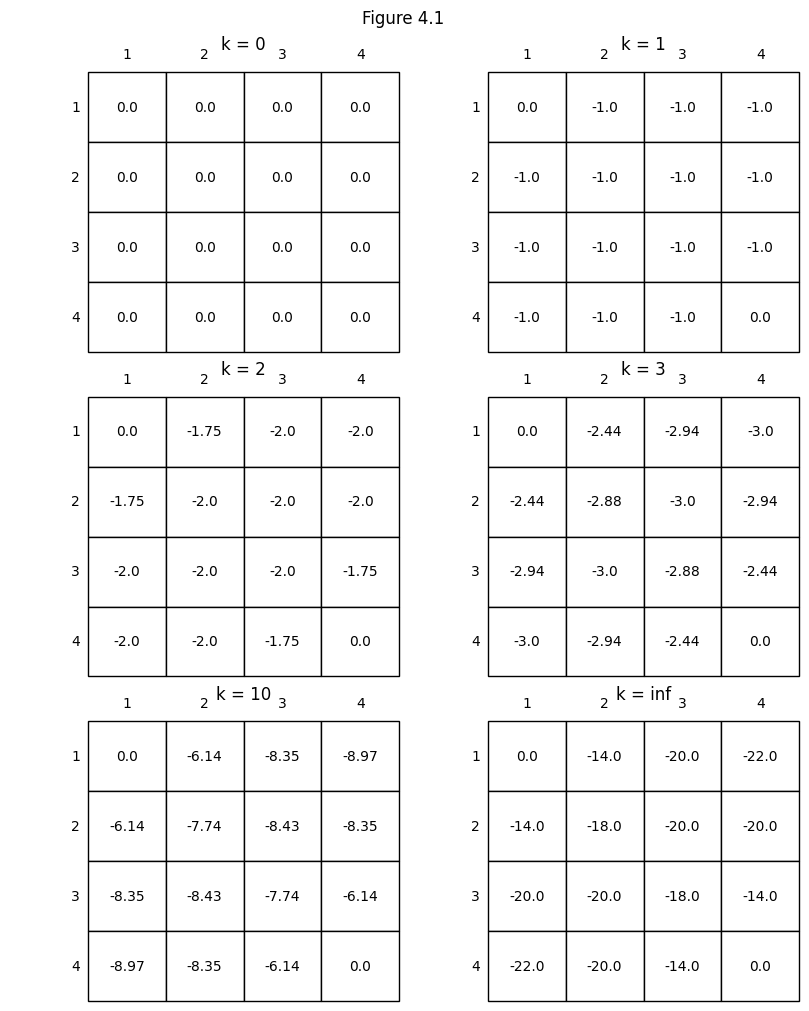

In [18]:
iters = [0, 1, 2, 3, 10, np.inf]
figure_4_1(iters)
plt.suptitle("Figure 4.1")
plt.show()